In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random

df=pd.read_csv('/content/drive/MyDrive/ml mini proj mtech/deceptive-opinion.csv')
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [5]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text
df['text']=df['text'].apply(text_cleaning)

In [6]:
#drop the feature hotel
df=df.drop(['hotel'],axis=1)
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [15]:
x=df['text']
y=df['deceptive']

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming you have a DataFrame df with 'text' column and 'deceptive' column indicating deceptive (1) or not (0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AlexNet for text classification- not suitable so here is a custom cnn model

In [17]:
# Tokenize and pad sequences
max_words = 10000  # Adjust based on your vocabulary size
max_len = 100  # Adjust based on your maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [19]:
# Convert the padded sequences to a dense NumPy array
X_train_padded_dense = np.array(X_train_padded)
X_test_padded_dense = np.array(X_test_padded)

In [11]:
from sklearn.preprocessing import OneHotEncoder
# Use OneHotEncoder for the 'label' column
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
# Convert padded sequences back to text
X_train_text = [' '.join(map(str, seq)) for seq in X_train_padded]
X_test_text = [' '.join(map(str, seq)) for seq in X_test_padded]

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = TfidfVectorizer()

# Transform the text data into one-hot encoded features
X_train_tfidf = count_vectorizer.fit_transform(X_train_text)
X_test_tfidf = count_vectorizer.transform(X_test_text)

In [26]:
# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/5
32/32 [==============================] - 2s 38ms/step - loss: 0.6932 - accuracy: 0.5068 - val_loss: 0.6914 - val_accuracy: 0.5312
Epoch 2/5
32/32 [==============================] - 1s 34ms/step - loss: 0.6909 - accuracy: 0.5527 - val_loss: 0.6833 - val_accuracy: 0.6055
Epoch 3/5
32/32 [==============================] - 1s 35ms/step - loss: 0.5175 - accuracy: 0.7930 - val_loss: 0.5455 - val_accuracy: 0.7461
Epoch 4/5
32/32 [==============================] - 1s 34ms/step - loss: 0.1745 - accuracy: 0.9355 - val_loss: 0.6945 - val_accuracy: 0.7461
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: 0.6205 - accuracy: 0.8094
Test Loss: 0.6204699277877808, Test Accuracy: 0.809374988079071


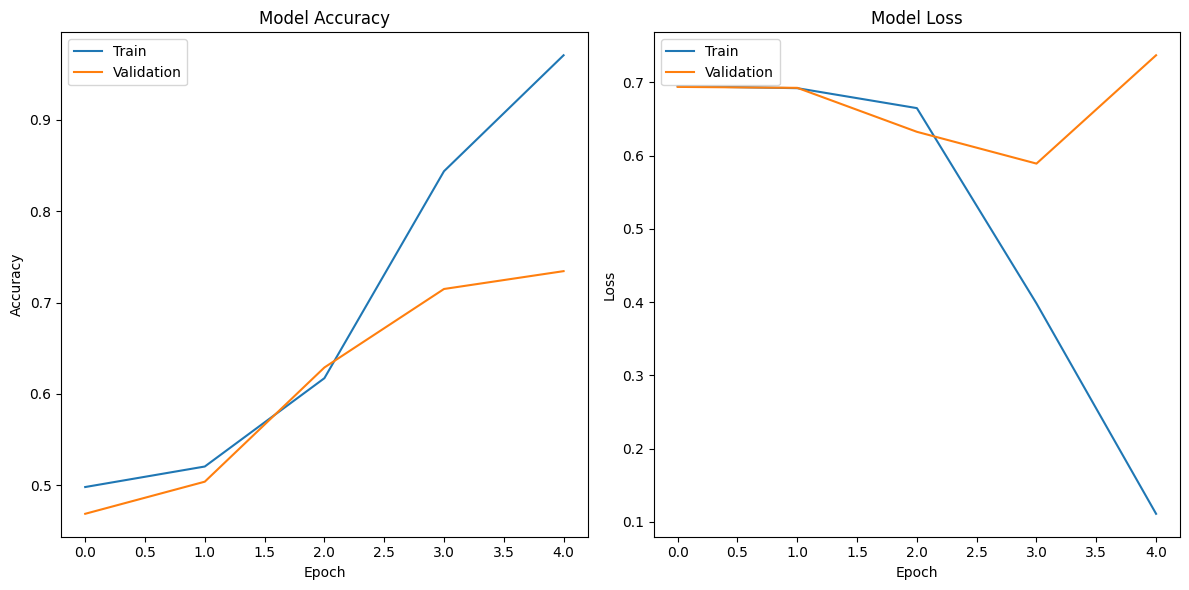

In [ ]:
#Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

RNN- LSTM without hyperparameter

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_2=model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/5
32/32 [==============================] - 5s 80ms/step - loss: 0.6901 - accuracy: 0.5459 - val_loss: 0.6835 - val_accuracy: 0.5664
Epoch 2/5
32/32 [==============================] - 2s 63ms/step - loss: 0.5259 - accuracy: 0.7539 - val_loss: 0.6351 - val_accuracy: 0.6992
Epoch 3/5
32/32 [==============================] - 2s 76ms/step - loss: 0.2295 - accuracy: 0.9141 - val_loss: 0.6311 - val_accuracy: 0.7109
Epoch 4/5
32/32 [==============================] - 3s 90ms/step - loss: 0.0796 - accuracy: 0.9766 - val_loss: 0.9717 - val_accuracy: 0.6562
Epoch 5/5
10/10 [==============================] - 0s 23ms/step - loss: 0.8101 - accuracy: 0.7781
Test Loss: 0.8101421594619751, Test Accuracy: 0.778124988079071


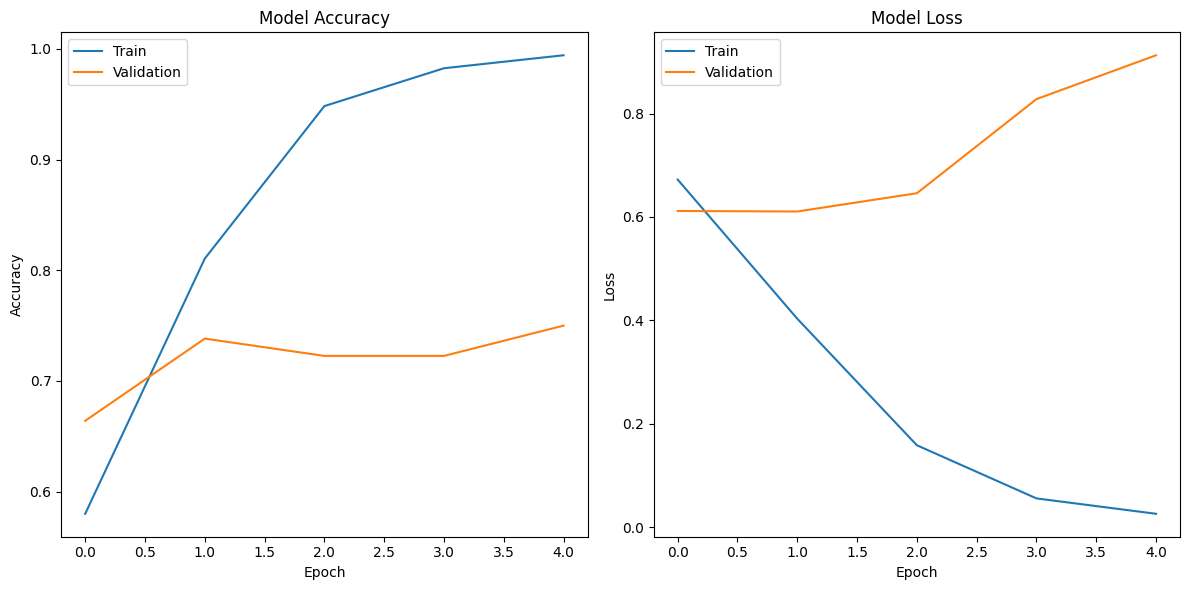

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
y_pred = history_2.model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

10/10 [==============================] - 1s 30ms/step


In [ ]:
# Calculate and print precision, recall, and f1-score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
classification_rep = classification_report(y_test_encoded, y_pred_classes, target_names=['deceptive', 'truthful'])
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

   deceptive       0.47      1.00      0.64       152
    truthful       0.00      0.00      0.00       168

    accuracy                           0.48       320
   macro avg       0.24      0.50      0.32       320
weighted avg       0.23      0.47      0.31       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


lstm - hyperparameters

In [28]:
lstm_units = 100
epochs_new = 10
#same only batch_size = 32
learning_rate = 0.001

In [29]:
# Define the RNN model
model_2= Sequential()
model_2.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model_2.add(LSTM(lstm_units, return_sequences=True))
model_2.add(LSTM(lstm_units))
model_2.add(Dense(1, activation='sigmoid'))

In [31]:
import tensorflow

In [32]:
# Compile the model
model_2.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

# Train the model
history_rnn2=model_2.fit(X_train_padded, y_train_encoded, epochs=epochs_new, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_1, accuracy_1 = model_2.evaluate(X_test_padded, y_test_encoded)
print(f'Test Loss: {loss_1}, Test Accuracy: {accuracy_1}')

Epoch 1/10
32/32 [==============================] - 5s 104ms/step - loss: 0.6585 - accuracy: 0.5967 - val_loss: 0.6258 - val_accuracy: 0.6680
Epoch 2/10
32/32 [==============================] - 4s 115ms/step - loss: 0.4149 - accuracy: 0.8320 - val_loss: 0.6525 - val_accuracy: 0.6641
Epoch 3/10
32/32 [==============================] - 3s 96ms/step - loss: 0.1644 - accuracy: 0.9453 - val_loss: 0.7936 - val_accuracy: 0.7227
Epoch 4/10
32/32 [==============================] - 3s 89ms/step - loss: 0.0837 - accuracy: 0.9756 - val_loss: 0.6661 - val_accuracy: 0.6914
Epoch 5/10
32/32 [==============================] - 3s 88ms/step - loss: 0.0517 - accuracy: 0.9883 - val_loss: 1.0496 - val_accuracy: 0.7383
Epoch 6/10
32/32 [==============================] - 3s 95ms/step - loss: 0.0117 - accuracy: 0.9980 - val_loss: 1.2910 - val_accuracy: 0.7461
Epoch 7/10
32/32 [==============================] - 4s 119ms/step - loss: 0.0089 - accuracy: 0.9990 - val_loss: 1.2460 - val_accuracy: 0.7500
Epoch 8/10

In [34]:
import matplotlib.pyplot as plt

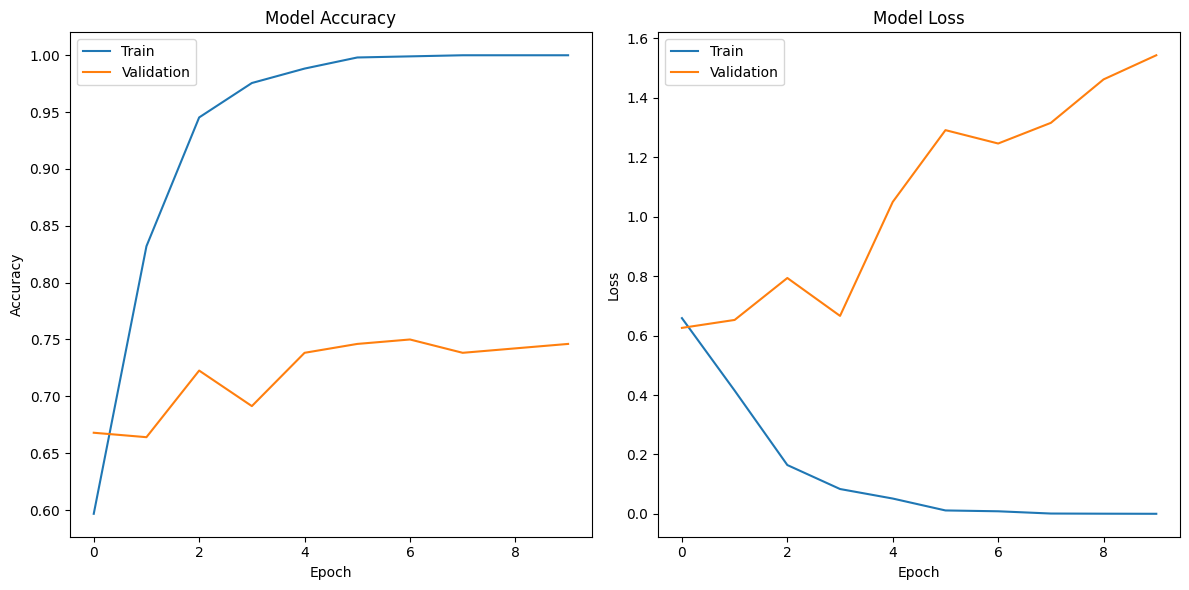

In [35]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_rnn2.history['accuracy'])
plt.plot(history_rnn2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_rnn2.history['loss'])
plt.plot(history_rnn2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

LSTM with hyperparameter tuning

In [ ]:
pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
# Tokenize and pad sequences
max_words = 10000  # Adjust based on your vocabulary size
max_len = 100  # Adjust based on your maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
X_train_padded.shape

(1280, 100)

In [ ]:
X_test_padded.shape

(320, 100)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X is your raw text data
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust parameters as needed
X_tfidf = vectorizer.fit_transform(x)


In [ ]:
# Split the data into training and testing sets
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:

# Use OneHotEncoder for the 'label' column
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Concatenate TF-IDF features with tokenized/padded sequences
from scipy.sparse import hstack

X_train_combined_h = hstack([X_train_combined, X_train_padded])
X_test_combined_h = hstack([X_test_combined, X_test_padded])

In [ ]:
from keras.layers import Dropout

# Define the global dropout rate
global_dropout_rate = 0.5

def create_lstm_model(units=64):
    model = Sequential()
    model.add(Embedding(input_dim=X_train_combined_h.shape[1], output_dim=50, input_length=X_train_combined_h.shape[1]))
    model.add(LSTM(units, return_sequences=True, dropout=global_dropout_rate))
    model.add(LSTM(units, dropout=global_dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
# Create a KerasClassifier wrapper for GridSearchCV
lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=32, verbose=0)




In [ ]:

# Define hyperparameter grid
param_grid = {
    'units': [32, 64]
    'dropout_rate': [0.3, 0.5],
}

In [ ]:

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=lstm_classifier, param_grid=param_grid, cv=3, verbose=1)


In [ ]:

# Perform grid search
grid_search.fit(X_train_combined, y_train_encoded)

In [ ]:

# Perform grid search
grid_search.fit(X_train_combined, y_train_encoded)

In [ ]:


# Print best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Model Score: ", grid_search.best_score_)

# Get the best model
best_lstm_model = grid_search.best_estimator_.model

# Evaluate the best model on the test set
loss, accuracy = best_lstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


GRU

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Define the RNN model with GRU layers
model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model_gru.add(GRU(64, return_sequences=True))
model_gru.add(GRU(64))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the GRU model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the GRU model
history_gru = model_gru.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the GRU model on the test set
loss_gru, accuracy_gru = model_gru.evaluate(X_test_padded, y_test_encoded)
print(f'Test Loss (GRU): {loss_gru}, Test Accuracy (GRU): {accuracy_gru}')


Epoch 1/5
32/32 [==============================] - 9s 123ms/step - loss: 0.6903 - accuracy: 0.5547 - val_loss: 0.6824 - val_accuracy: 0.6094
Epoch 2/5
32/32 [==============================] - 3s 102ms/step - loss: 0.5434 - accuracy: 0.7441 - val_loss: 0.7235 - val_accuracy: 0.6641
Epoch 3/5
32/32 [==============================] - 4s 117ms/step - loss: 0.2784 - accuracy: 0.8857 - val_loss: 0.8134 - val_accuracy: 0.6797
Epoch 4/5
32/32 [==============================] - 5s 144ms/step - loss: 0.1200 - accuracy: 0.9619 - val_loss: 0.9479 - val_accuracy: 0.6562
Epoch 5/5
10/10 [==============================] - 0s 29ms/step - loss: 1.2071 - accuracy: 0.6438
Test Loss (GRU): 1.2070741653442383, Test Accuracy (GRU): 0.643750011920929


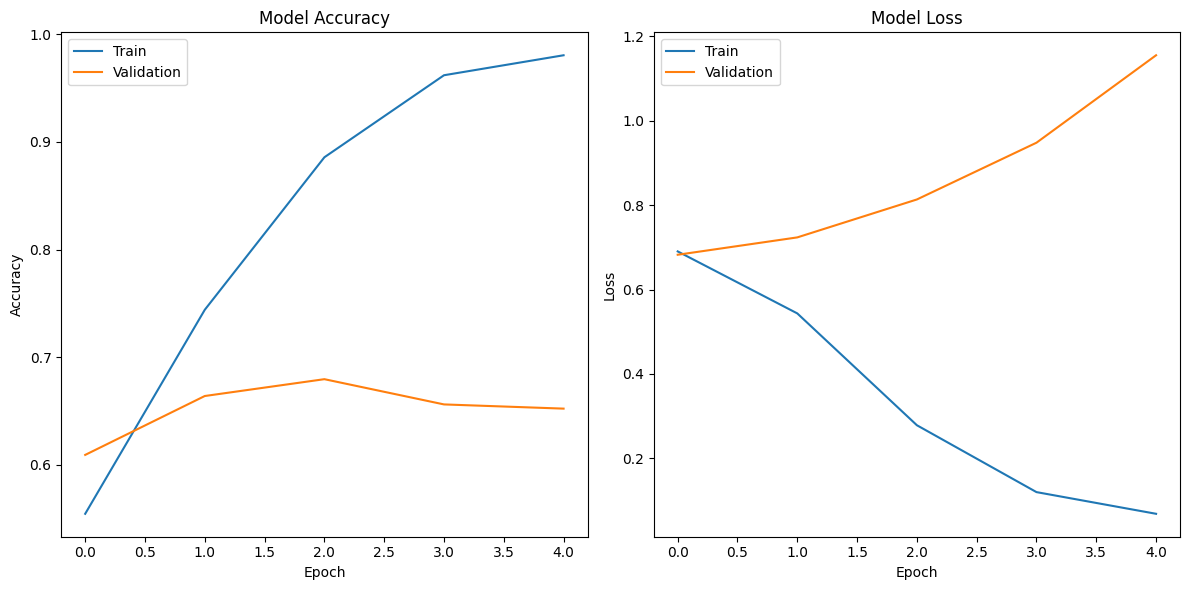

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

ADABOOST

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

count_vectorizer = TfidfVectorizer()

# Transform the text data into one-hot encoded features
X_train_Tfidf = count_vectorizer.fit_transform(X_train)
X_test_Tfidf = count_vectorizer.transform(X_test)

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_padded, X_test_padded, y_train_encoded, y_test_encoded are available

# Create a base learner (Decision Tree Classifier)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create Adaboost classifier with the base learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the Adaboost classifier
adaboost_classifier.fit(X_train_Tfidf, y_train_encoded)

# Predict using the Adaboost classifier
adaboost_predictions = adaboost_classifier.predict(X_test_Tfidf)

# Evaluate the Adaboost classifier
accuracy_adaboost = accuracy_score(y_test_encoded, adaboost_predictions)
print(f'Adaboost Accuracy: {accuracy_adaboost}')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Accuracy: 0.790625


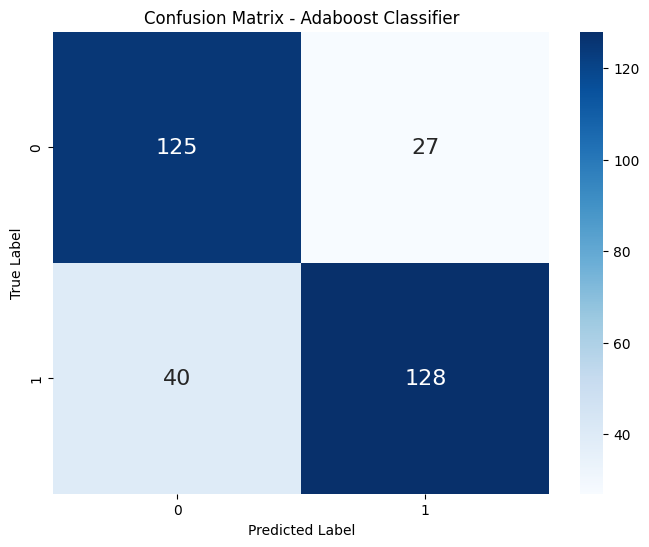

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test_encoded and adaboost_predictions are available

# Create a confusion matrix
cm = confusion_matrix(y_test_encoded, adaboost_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Adaboost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assuming X_test, y_test, and adaboost_classifier are available

# Make predictions
predictions = adaboost_classifier.predict(X_test_Tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print(f'AdaBoost Accuracy: {accuracy}')

# Calculate precision and recall
precision = precision_score(y_test_encoded, predictions)
recall = recall_score(y_test_encoded, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')




AdaBoost Accuracy: 0.790625
Precision: 0.8258064516129032
Recall: 0.7619047619047619
